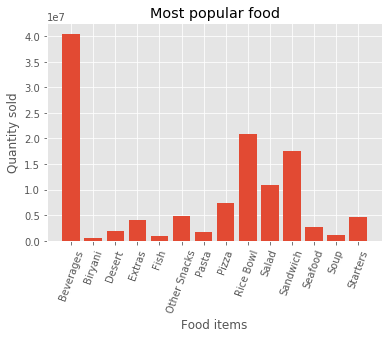

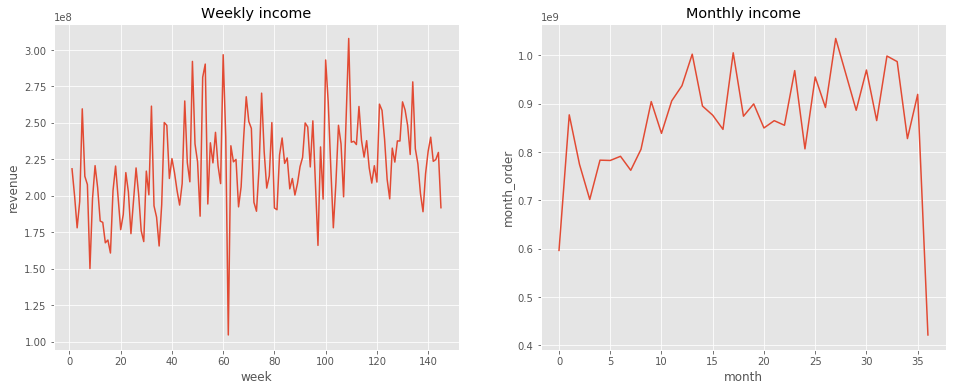

In [2]:
'''Note: 

* Before writing any code remember that this assigment is for helping you understand the basics of file
handling in csv file. 

* This project is designed to have a work flow such that everyone is in same page for this purpose the variables are
given a strict name which should not be changed or modified according to your convinience

* Few of new functions like .head() .xticks().... and concepts may have been introduced in the assingment, so we encourage you
all to go through them without skipping.

*  functions which are to be used in the Your code sections are globally available so try to look for those where you have been prompted
'''

'''Its the data of a meal delivery company which operates in multiple cities. 
They have various fulfillment centers in these cities for dispatching meal orders to their customers.
train.csv: Historical data of demand for a product-center combination 
fulfilment_center_info.csv: Information for fulfillment center like center area, city information etc.
meal_info.csv: Product(Meal) features such as category, sub-category, current price and discount'''


'''START CODE'''

#Import necessary libraries: Numpy,pandas,matplotlib

'''************************Your code here**********************'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
plt.style.use('ggplot')
'''************************************************************'''


#read meal_info.csv file from provided dataset into a df_meal named variable
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_meal = pd.read_csv('meal_info.csv')
'''************************************************************'''


df_meal.head() #'''This is for displaying first five data points'''

#read fulfilment_center_info.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_center = pd.read_csv('fulfilment_center_info.csv')
'''************************************************************'''

df_center.head() #'''This is for displaying first five data points'''

#read train.csv file from provided dataset
#Note: Proper file directory should be provided

'''************************Your code here**********************'''
df_food = pd.read_csv('train.csv')
'''************************************************************'''

df_food.head()

'''Since the provided information is in different files, your work here is to merge them.Look for the functions
in pandas library to do so'''

'''************************Your code here**********************'''
df = pd.merge(df_food, df_center, on='center_id', how='inner')
df = pd.merge(df, df_meal, on='meal_id', how='inner')
'''************************************************************'''

'''Here we have used pd.pivot_table() kindly go through the function and mention in comment what it does'''

table = pd.pivot_table(data=df,index='category',values='num_orders',aggfunc=np.sum)

'''Graph tweaking
************************
Plot a bar graph with title 'Most popular food' for category(x-axis) vs number-of-orders(y-axis)

give x label 'Food items'
give y label 'Quantity sold'


'''
'''************Yourcode*********************'''

#bar graph
plt.bar(table.index, table['num_orders'])
#xticks 
plt.xticks(rotation=70) #'''Write on comment what you feel this function does'''
#x-axis labels 
plt.xlabel("Food items")
#y-axis labels 
plt.ylabel('Quantity sold')
#plot title 
plt.title('Most popular food')
#save plot 
plt.savefig('Most_popular_food_bar.png')
#display 
plt.show()
#'''************************************************'''

'''Comparison of weekly and monthly sales
 Create a new column
* named 'revenue' where each element is product of checkout_price and num_orders 
** named 'month' by using ['week'] column (week column value divided by 4 gives month value)'''



'''**************************Your code******************************'''
df['revenue'] = (df.checkout_price * df.num_orders)
df['month'] = (df.week // 4)
'''******************************************************************'''
'''Here we have created two list month and month_order ,
store month number in month list and revenue of each month in month_order'''
#list to store month-wise revenue 
month=[] 
month_order=[] 
table1 = pd.pivot_table(data=df,index='month',values='revenue',aggfunc=np.sum)
month = table1.index.tolist()
month_order = table1['revenue'].tolist()
'''***********************************Your code***********************'''

    
'''*********************************************************************'''
'''Here we have created two list week and week_order ,you need to store in them mapping the monthly orders'''    
#list to store week-wise revenue 
week=[] 
week_order=[] 

'''***********************************Your code***********************'''
table2 = pd.pivot_table(data=df,index='week',values='revenue',aggfunc=np.sum)
week = table2.index.tolist()
week_order = table2['revenue'].tolist()
'''*********************************************************************'''
''' Plot two subplots in the same space : one for weekly revenue and other for monthly revenue.
For weekly : Title(Weekly income),x_label(week),y_label(revenue); similarly for monthly revenue.
'''

'''************Yourcode*********************'''

plt.figure(figsize = (16,6))
plt.subplot(121)
plt.plot(week, week_order)
plt.title('Weekly income')
plt.xlabel('week')
plt.ylabel('revenue')
plt.subplot(122)
plt.plot(month, month_order)
plt.title('Monthly income')
plt.xlabel('month')
plt.ylabel('month_order')
plt.show()

# ''' Display the plot'''
